In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(pd.__version__)

2.0.3


In [2]:
adult_census = pd.read_csv("./datasets/adult-census.csv")

In [3]:
adult_census.head() # shows the top 5 records
adult_census # shows top 5 and bottom 5

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# so the column named 'class' is gonna be our target variable
# the two possible classes we can have are :
# <= 50K (low-revenue) and, > 50K (high-revenue)
# so that measn our problem is a classification problem, since we have
# to predict the 'class' of the person/adult over here
# and it having only two values means it is a binary classification problem
# so every other column other than class - those are gonna be the input ot our model!

# alright, lets take a look into the 'class' variable:
target_column = "class"
adult_census[target_column].value_counts()

class
 <=50K    37155
 >50K     11687
Name: count, dtype: int64

In [5]:
# we need to segregate the numerical columns (continuous variables), from the categorical (distinct) columns:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

# aggregate them as well for further use:
all_columns = numerical_columns + categorical_columns + [target_column]

# re-initialize the data frame!
adult_census = adult_census[all_columns]

In [6]:
# lets check the number of samples and the number of columns available in the dataset:
print(
    f"The dataset contains {adult_census.shape[0]} samples and"
    f"{adult_census.shape[1]} columns."
)

The dataset contains 48842 samples and14 columns.


In [7]:
"""
    We can compute the number of features by counting the number of columns and subtract 1, 
    since one of the columns is the target.
"""
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


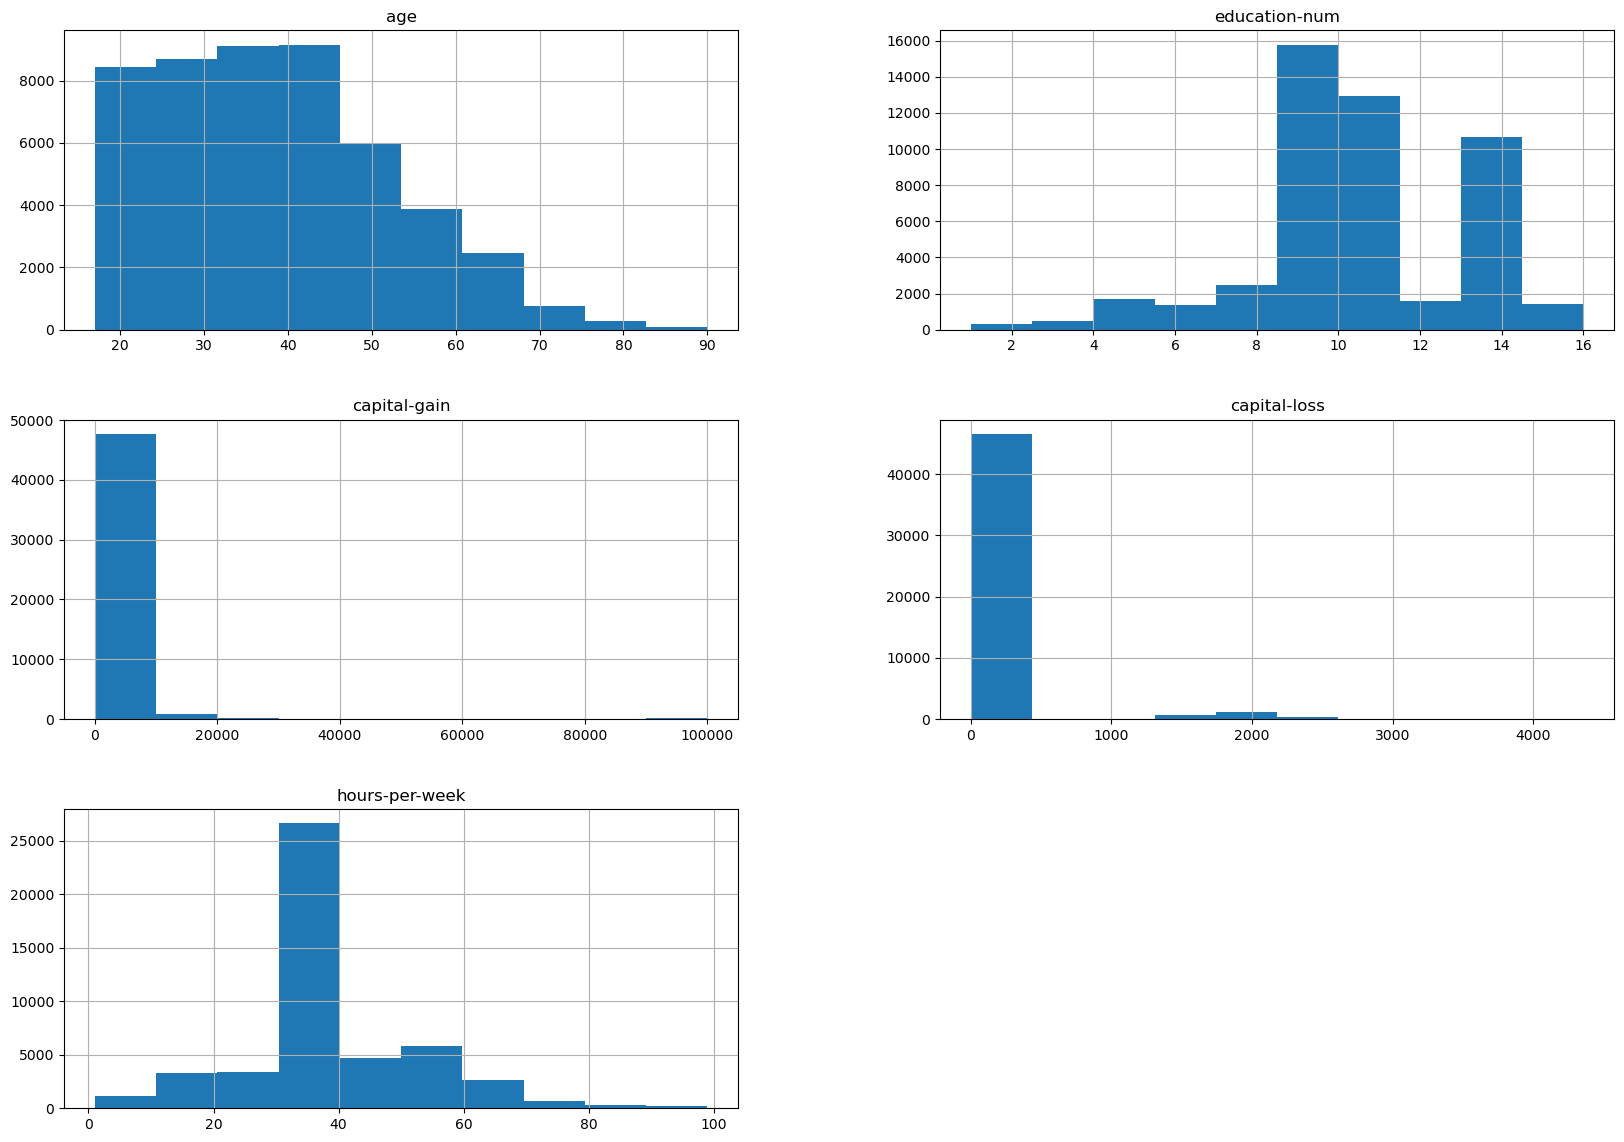

In [8]:
# Now for some visual inspection of the data:
# we'll look at the distribution of individual features to get some insights:
# lets plot histograms first:
_ = adult_census.hist(figsize = (20, 14))

In [9]:
# lets take a look at a categorical variable:
adult_census["sex"].value_counts()

sex
 Male      32650
 Female    16192
Name: count, dtype: int64

In [10]:
adult_census["education"].value_counts()

education
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: count, dtype: int64

In [11]:
"""
As noted above, "education-num" distribution has two clear peaks around 10 and 13. 
It would be reasonable to expect that "education-num" is the number of years of education.
"""

# now lets taka a look at the relationship between 'education' and 'education-num':
pd.crosstab(
    index = adult_census["education"], columns = adult_census["education-num"]
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


/Users/nchan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


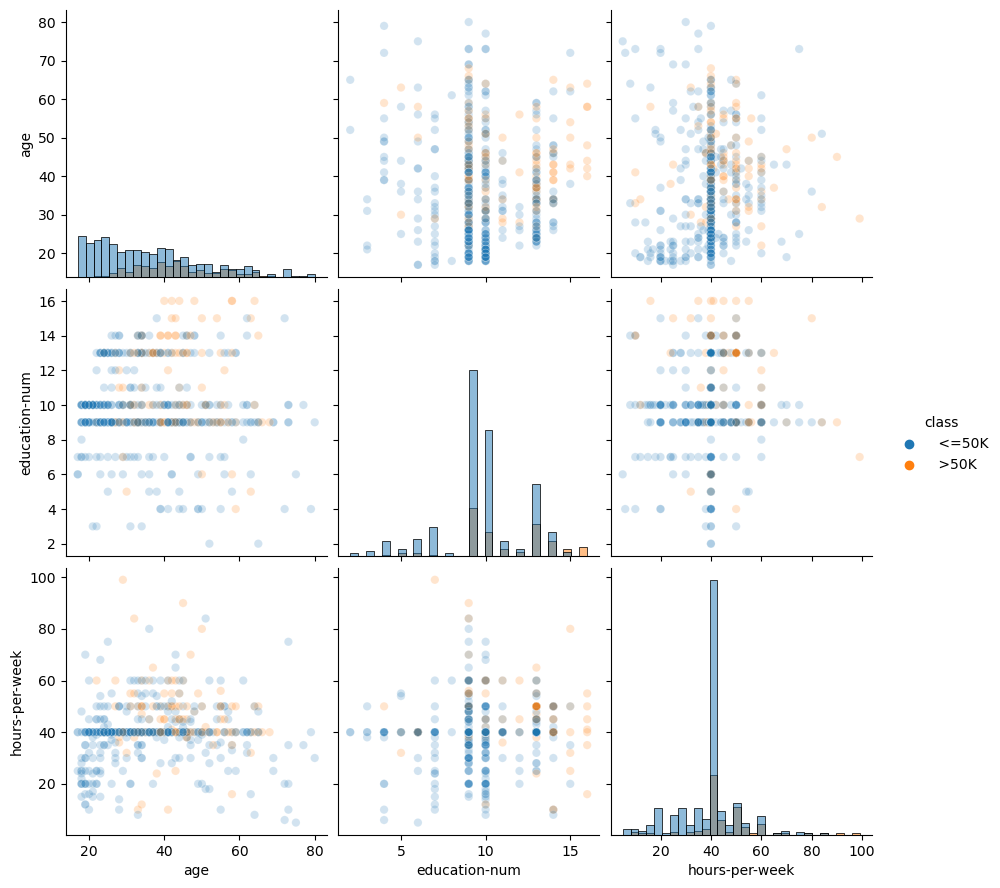

In [12]:
# as we can see, btoh are highly correlated, and hence redundant, so we will only keep
# the 'education' variable.

# now netxt, we'll do a pairplot to see how each variable differs according to our target:
n_samples_to_plot = 500
columns = ["age", "education-num", "hours-per-week"]

_ = sns.pairplot(
    data = adult_census[:n_samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws = {"alpha": 0.2},
    height = 3,
    diag_kind = "hist",
    diag_kws = {"bins": 30},
)

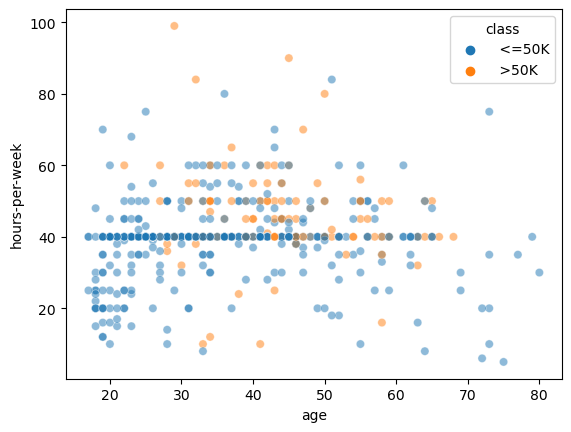

In [13]:
# we'll create decision rules by hand now, by like focusing on the combination of different
# features and plotting and checking them:
_ = sns.scatterplot(
    x = "age",
    y = "hours-per-week",
    data = adult_census[:n_samples_to_plot],
    hue = target_column,
    alpha = 0.5
)

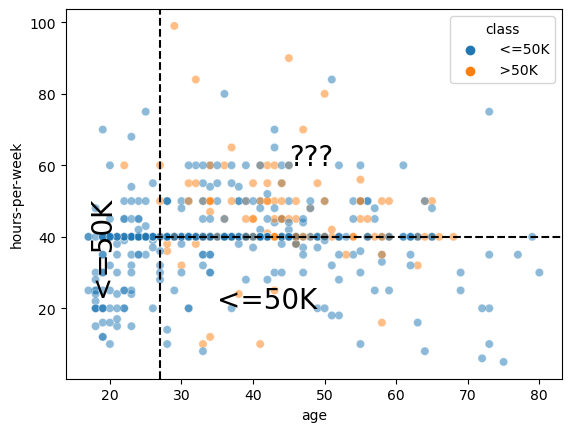

In [14]:
ax = sns.scatterplot(
    x = "age",
    y = "hours-per-week",
    data = adult_census[:n_samples_to_plot],
    hue = target_column,
    alpha = 0.5,
)

age_limit = 27

plt.axvline(
    x = age_limit, 
    ymin = 0, 
    ymax = 1, 
    color = "black", 
    linestyle = "--"
)

hours_per_week_limit = 40

plt.axhline(
    y = hours_per_week_limit,
    xmin = 0.18,
    xmax = 1,
    color = "black",
    linestyle = "--"
)

plt.annotate("<=50K", (17, 25), rotation = 90, fontsize = 20)
plt.annotate("<=50K", (35, 20), fontsize = 20)

_ = plt.annotate("???", (45, 60), fontsize = 20)


In [15]:
"""
    In the region age < 27 (left region) the prediction is low-income. 
    Indeed, there are many blue points and we cannot see any orange points.
    In the region age > 27 AND hours-per-week < 40 (bottom-right region), 
    the prediction is low-income. Indeed, there are many blue points and only a 
    few orange points.
    In the region age > 27 AND hours-per-week > 40 (top-right region), we 
    see a mix of blue points and orange points. It seems complicated to choose 
    which class we should predict in this region.
"""


'\n    In the region age < 27 (left region) the prediction is low-income. \n    Indeed, there are many blue points and we cannot see any orange points.\n    In the region age > 27 AND hours-per-week < 40 (bottom-right region), \n    the prediction is low-income. Indeed, there are many blue points and only a \n    few orange points.\n    In the region age > 27 AND hours-per-week > 40 (top-right region), we \n    see a mix of blue points and orange points. It seems complicated to choose \n    which class we should predict in this region.\n'